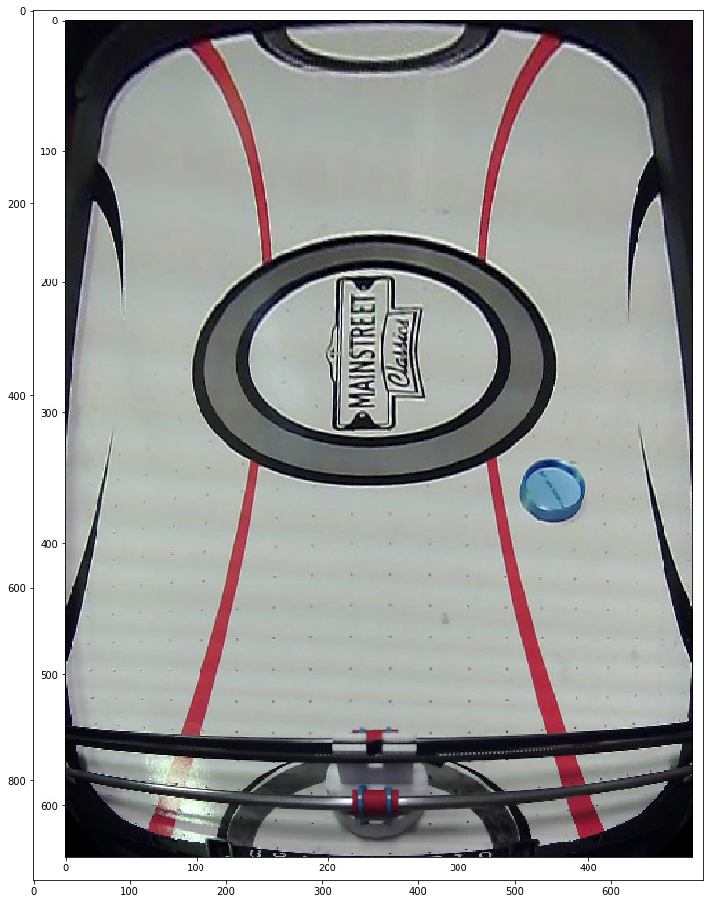

In [2]:
import numpy as np
import cv2
import imutils
import matplotlib.pyplot as plt

def show_img(image):
    plt.figure(figsize=(16,16))
    plt.imshow(image)

image=cv2.imread("homography_4.jpg")
orig = image.copy()
show_img(image)

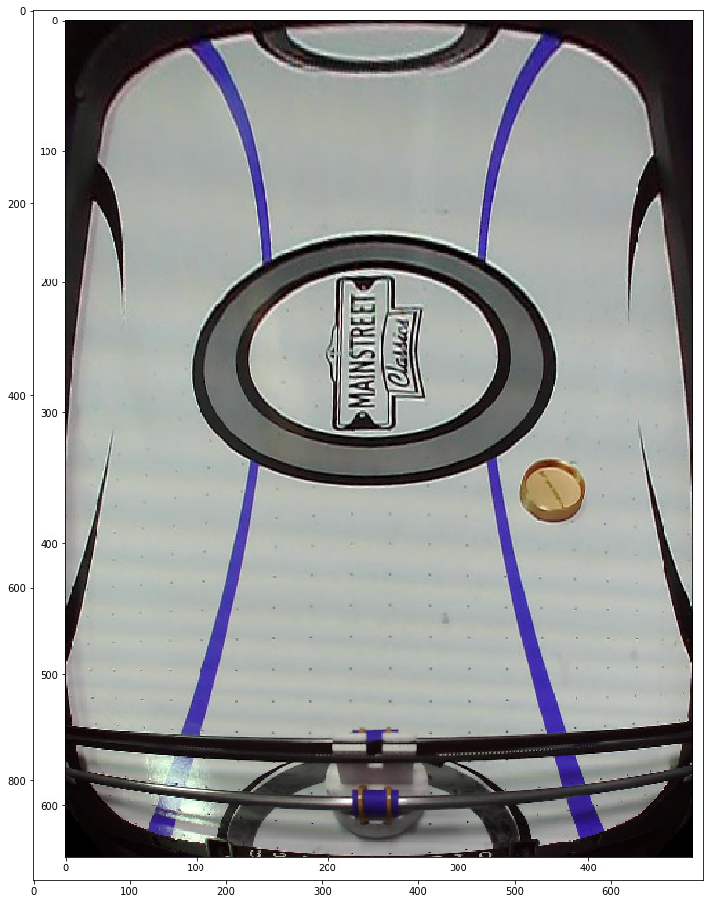

In [7]:
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
show_img(rgb)

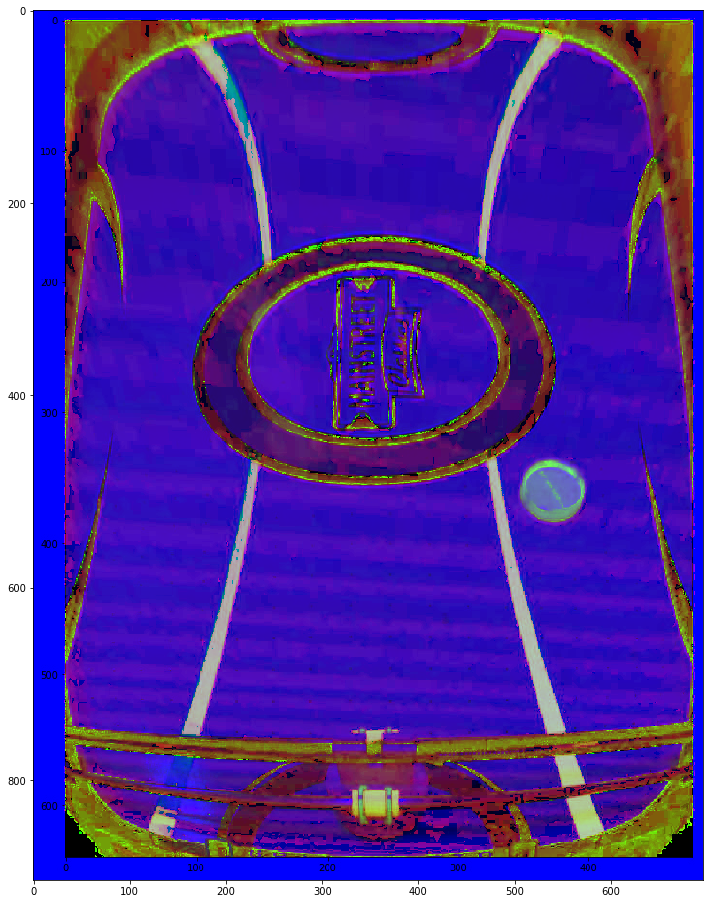

In [10]:
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
show_img(hsv)

In [13]:
h,s,v=cv2.split(hsv)

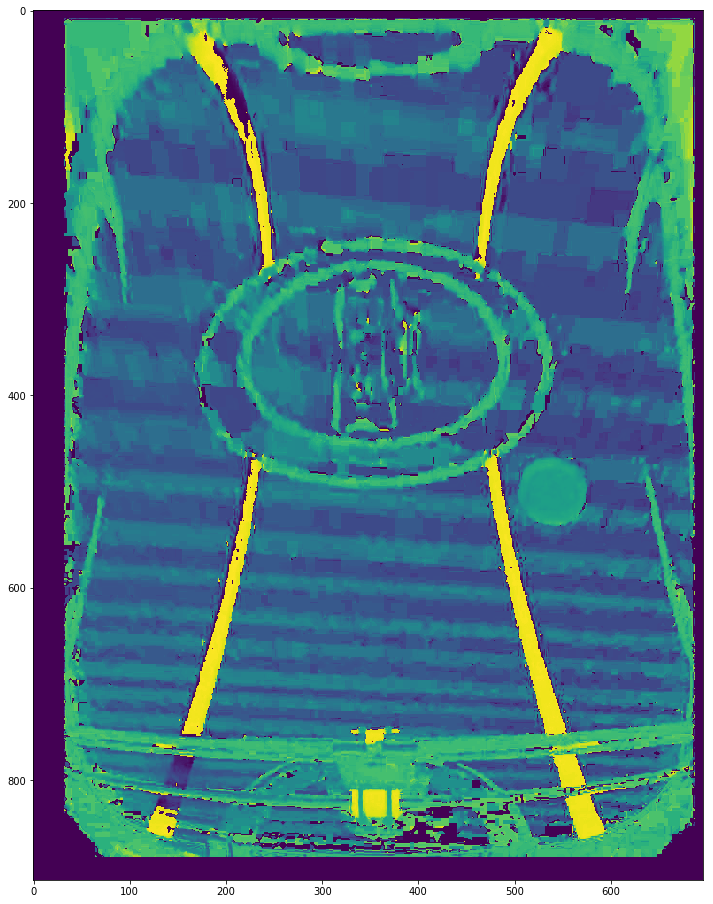

In [14]:
show_img(h)

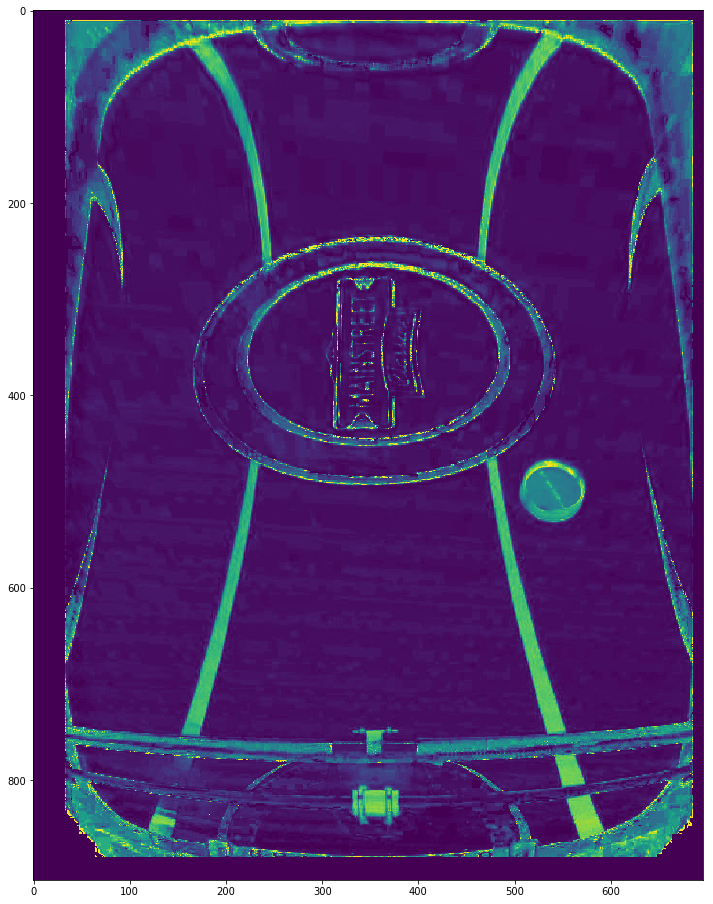

In [15]:
show_img(s)

In [73]:
show_img(rgb[474:522,520:565,:])

In [85]:
print rgb[474:522,520:565,:]

[[[108  57  30]
  [116  62  34]
  [118  63  33]
  ..., 
  [209 198 176]
  [199 197 176]
  [201 204 185]]

 [[118  54  26]
  [118  55  24]
  [121  56  26]
  ..., 
  [192 171 140]
  [187 176 148]
  [202 198 171]]

 [[129  58  26]
  [104  35   2]
  [ 98  29   0]
  ..., 
  [169 139 101]
  [161 141 104]
  [171 163 127]]

 ..., 
 [[136 104  57]
  [133  99  53]
  [134 100  54]
  ..., 
  [126  88  52]
  [113  77  43]
  [114  83  55]]

 [[136 103  58]
  [136 103  58]
  [136 102  56]
  ..., 
  [112  79  48]
  [113  82  54]
  [107  76  56]]

 [[128  95  54]
  [128  95  52]
  [133  98  56]
  ..., 
  [113  82  53]
  [110  82  58]
  [ 88  61  44]]]


In [191]:
pucklowerBound=np.array([130,0,0])
puckupperBound=np.array([255,255,140])

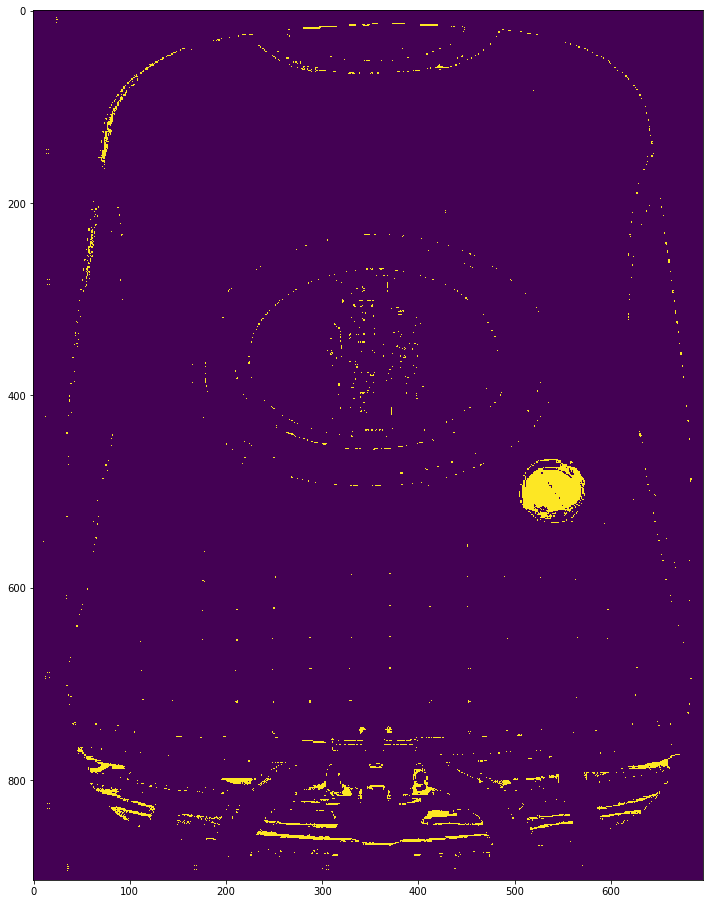

In [192]:
mask=cv2.inRange(rgb,pucklowerBound,puckupperBound)
show_img(mask)

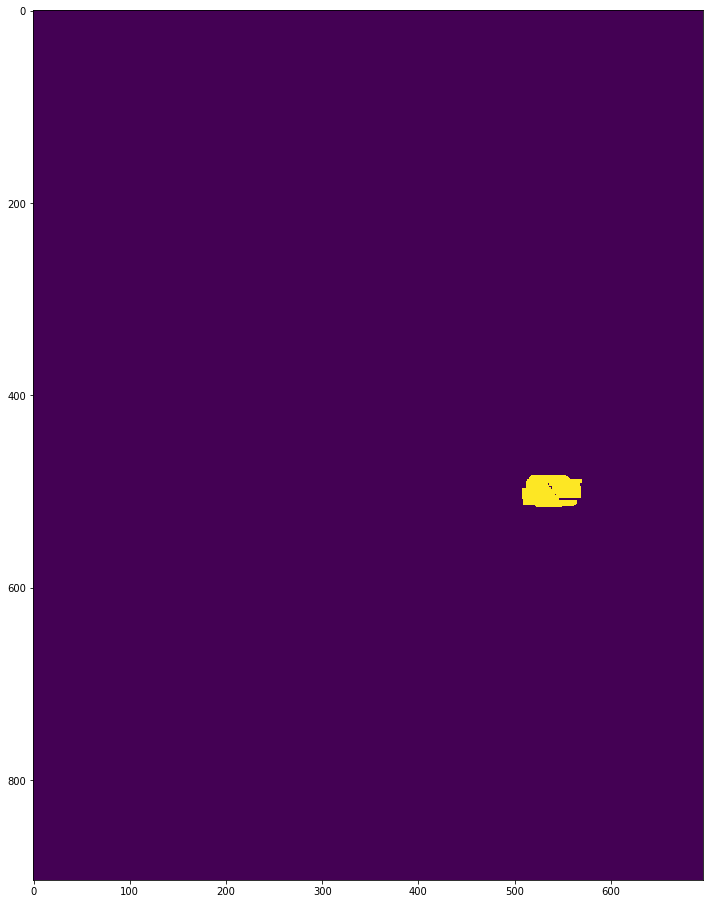

In [213]:
# we only want large objects since we are trying to detect
# the board. 1x60 is a good starting point. Can call again
# with override if the result is not good enough.
# this cleans up the outside noise
opened=cv2.morphologyEx(mask,cv2.MORPH_OPEN, np.ones((4,23)))
show_img(opened)

In [214]:
#todo: make sure external noise is completely removed

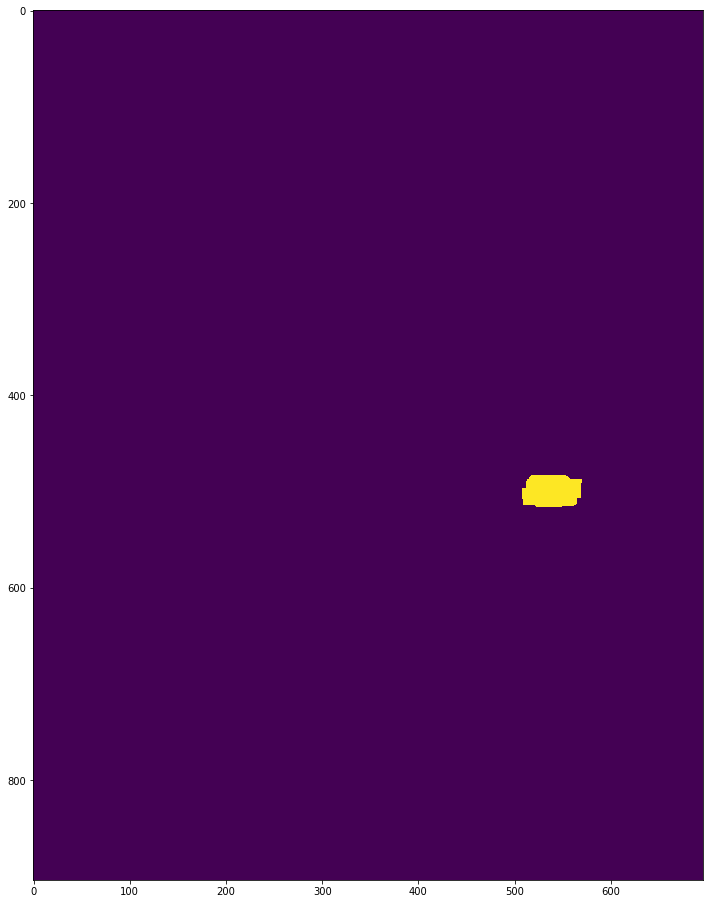

In [216]:
# this cleans up the noise on the inside and reduces the number of
# objects.
closed=cv2.morphologyEx(opened, cv2.MORPH_CLOSE, np.ones((15,15)))
show_img(closed)

In [218]:
_, contours, _=cv2.findContours(closed.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE);

In [219]:
len(contours)

1

In [229]:
xs, ys = np.where(closed > 0)
pts = np.array(zip(ys, xs))

In [230]:
pts

array([[517, 483],
       [518, 483],
       [519, 483],
       ..., 
       [547, 515],
       [548, 515],
       [549, 515]])

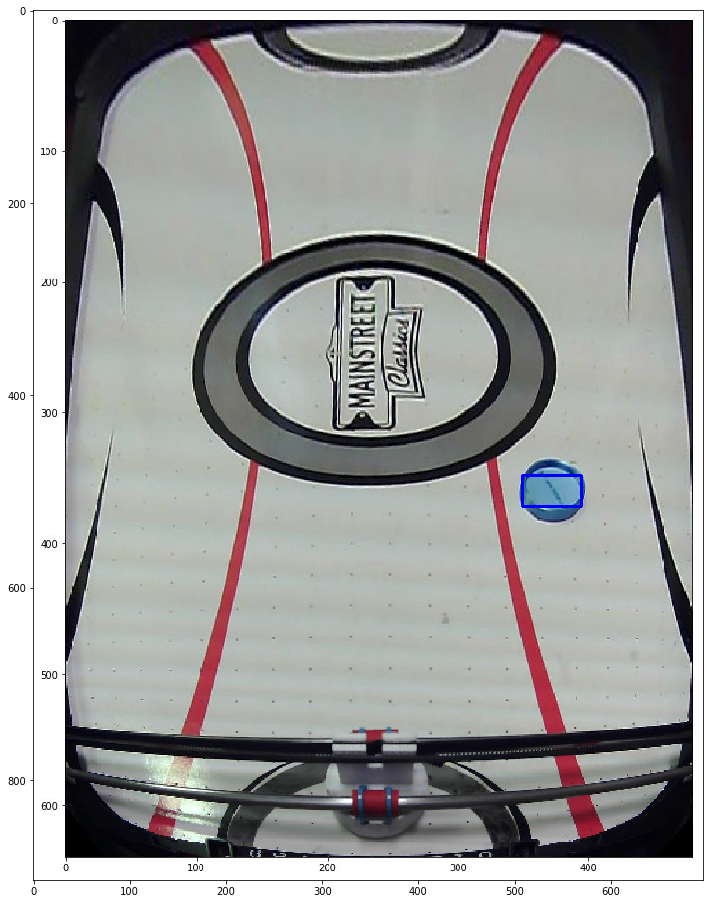

In [231]:
rect = cv2.minAreaRect(pts)
box = cv2.boxPoints(rect)
box = np.int0(box)

disp_img = image.copy()
cv2.drawContours(disp_img,[box],0,(0,0,255),2)
show_img(disp_img)

In [232]:
# convert points to tuple
rect_bot_left=tuple(box[0])
rect_top_left=tuple(box[1])
rect_top_right=tuple(box[2])
rect_bot_right=tuple(box[3])

In [254]:
center_x = rect_top_left[0] + ((rect_top_right[0] - rect_top_left[0])/2)

In [255]:
center_y = rect_top_left[1] + ((rect_bot_right[1] - rect_top_left[1])/2)

In [260]:
disp_img = image.copy()
img = cv2.circle(disp_img, (int(center_x), int(center_y)), 35, (0,255,0), 2)

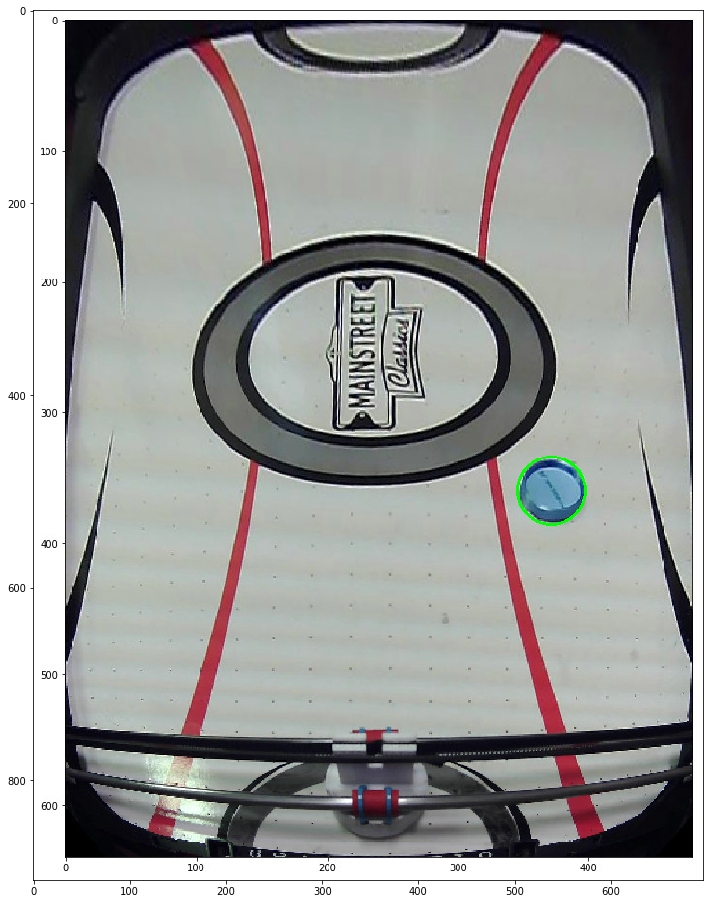

In [261]:
show_img(disp_img)